In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Read CSVs

match_rep_df = pd.read_csv("checkpoints/match_rep_df_NEW_PROFILES.csv")
match_rep_df

,Unnamed: 0.1,Vendor,Batch,Assay_Plate_Barcode,sphering,Percent_Replicating,Replicating,value_95_replicating,Null_Replicating,Plate_Map_Name,...,aperture,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Matching,Null_Matching,Percent_Matching,value_95_matching,cell_count
0,0,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,True,47.777778,"[-0.027618000883304884, 0.18312771454245114, 0...",0.134280,"[0.003193593453545385, 0.01106343995962411, -0...",JUMP-MOA_compound_platemap,...,NaN,NaN,NaN,NaN,1.0,"[0.3507114434647166, 0.10160465563984872, 0.02...","[-0.005227504026732103, 0.06974027983014286, -...",18.604651,0.172572,511430
1,1,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,False,17.777778,"[0.5527685471892425, 0.037208928790870746, 0.0...",0.389306,"[0.005640340787158903, 0.021454619840598807, 0...",JUMP-MOA_compound_platemap,...,NaN,NaN,NaN,NaN,1.0,"[0.18702255680249674, 0.07427635098930599, 0.0...","[0.004558146932577751, 0.011660754848519087, 0...",9.302326,0.232432,511430
2,2,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,True,56.666667,"[0.01731586028681164, 0.13644198128512797, 0.4...",0.172727,"[0.036181679417890494, 0.03061361631951322, 0....",JUMP-MOA_compound_platemap,...,NaN,NaN,NaN,NaN,1.0,"[0.46066182474047335, 0.1481179586000907, -0.0...","[0.317516750787159, 0.053213901358646926, -0.0...",18.604651,0.244286,617546
3,3,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,False,23.333333,"[0.028781342485395787, 0.14294133780901438, 0....",0.486376,"[0.09206131140075391, 0.16354402604627988, 0.2...",JUMP-MOA_compound_platemap,...,NaN,NaN,NaN,NaN,1.0,"[0.20698204580441934, 0.11978347592518973, 0.0...","[0.1624951956628807, 0.02952418389215093, 0.00...",13.953488,0.359418,617546
4,4,MolDev,1siteSubSample_Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,True,62.222222,"[-0.020618350955052406, 0.45119291841703046, 0...",0.171848,"[0.010573950185696726, -0.037941088515260415, ...",JUMP-MOA_compound_platemap,...,NaN,NaN,NaN,NaN,1.0,"[0.5964069668030667, 0.2299215609249304, -0.00...","[0.16629683323488487, -0.031409390403463314, 0...",20.930233,0.276754,608864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,357,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,BRO0117059_20X,False,58.888889,"[0.3250349540457149, 0.3169034451652193, 0.560...",0.445621,"[0.22215737340870584, 0.4706032484054863, -0.0...",JUMP-MOA_compound_platemap,...,1.0,water,yes,4.0,9.0,"[0.6880144269318078, 0.04595524946669553, 0.07...","[0.21107833485901234, 0.3297573942133387, 0.50...",18.604651,0.519666,1136319
358,358,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,BRO01177034_20x,True,60.000000,"[0.027983462966288015, 0.42320388335119197, 0....",0.214643,"[0.06579903533930513, 0.0007356878997103918, 0...",JUMP-MOA_compound_platemap,...,1.0,water,yes,1.0,9.0,"[0.6195469678282404, 0.10586497978961532, -0.0...","[0.058818917988733566, 0.17050670062254, -0.00...",25.581395,0.324134,1045379
359,359,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,BRO01177034_20x,False,52.222222,"[-0.05187009450201826, 0.32407283524529734, 0....",0.295594,"[0.12484022685779182, 0.048102173140099846, 0....",JUMP-MOA_compound_platemap,...,1.0,water,yes,1.0,9.0,"[0.6371114767555974, -0.03560393978533341, 0.0...","[-0.0806977000766201, 0.12910328725678566, -0....",20.930233,0.368823,1045379
360,360,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,True,57.777778,"[0.14370437064571912, 0.3096056212627767, 0.27...",0.190698,NaN,JUMP-MOA_compound_platemap,...,1.0,water,yes,4.0,9.0,"[0.7136972119728984, 0.03348700791296161, 0.12...","[0.12112131120022052, 0.05304383950000435, 0.0...",20.930233,0.265621,279900


In [89]:
def group_plot(df, x, y, group, error_x=None, error_y=None, fig=None, ax_=None, legend=True, label=None):
    cmap = plt.cm.tab10
    colour_palette = list()
    for i in range(cmap.N):
        colour_palette.append(cmap(i))
    
    if fig is None and ax_ is None:
        fig, ax = plt.subplots()
    else:
        ax = ax_
    for i, (group_label, group_df) in enumerate(df.groupby(group)):
        if error_x is not None or error_y is not None:
            ax.errorbar(
                group_df.loc[:, x], 
                group_df.loc[:, y],
                xerr=group_df[error_x],
                yerr=group_df[error_y],
                ecolor=colour_palette[i],
                label=group_label,
                # fmt="none",
                # zorder=1,
                lw=1 # Required to get error bars centered. Classic matplotlib
            )
        else:
            ax.scatter(
                group_df.loc[:, x],
                group_df.loc[:, y],
                color=colour_palette[i], 
                label=group_label,
                # zorder=2
            )
            # Only draw legend for scatter plots
            if legend:
                ax.legend()

        if label:
            for col, rows in label.items():
                for item in rows:
                    annotate_x = group_df[group_df[col] == item][x].values
                    annotate_y = group_df[group_df[col] == item][y].values
                    ax.annotate(item, annotate_x, annotate_y)

    ax.set_title(group, size=15)
    # ax.set_xscale("log")
    ax.set_xlabel(x, fontsize=15)
    ax.set_ylabel(y, fontsize=15)
    plt.tight_layout()
    fig.set_facecolor("white")
    plt.subplots_adjust( 
                    wspace=0.2,
                    hspace=0.2)

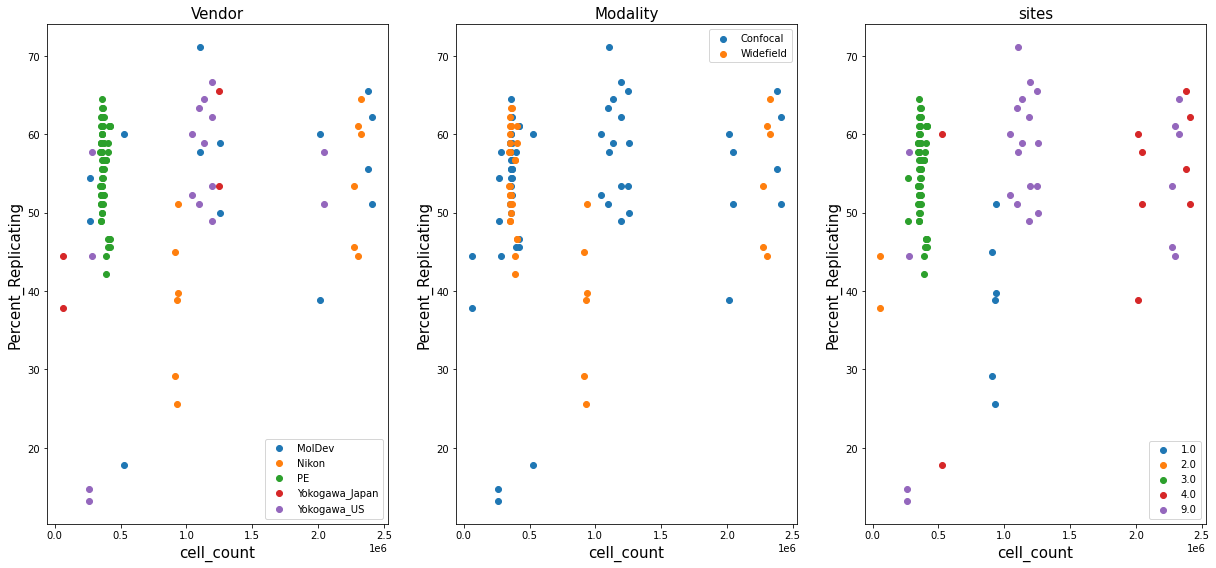

In [90]:
group_columns = ["Vendor", "Modality", "sites"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSub"))]
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(17,8))
for i, _ax in zip(group_columns, ax.flatten()):
    group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax)

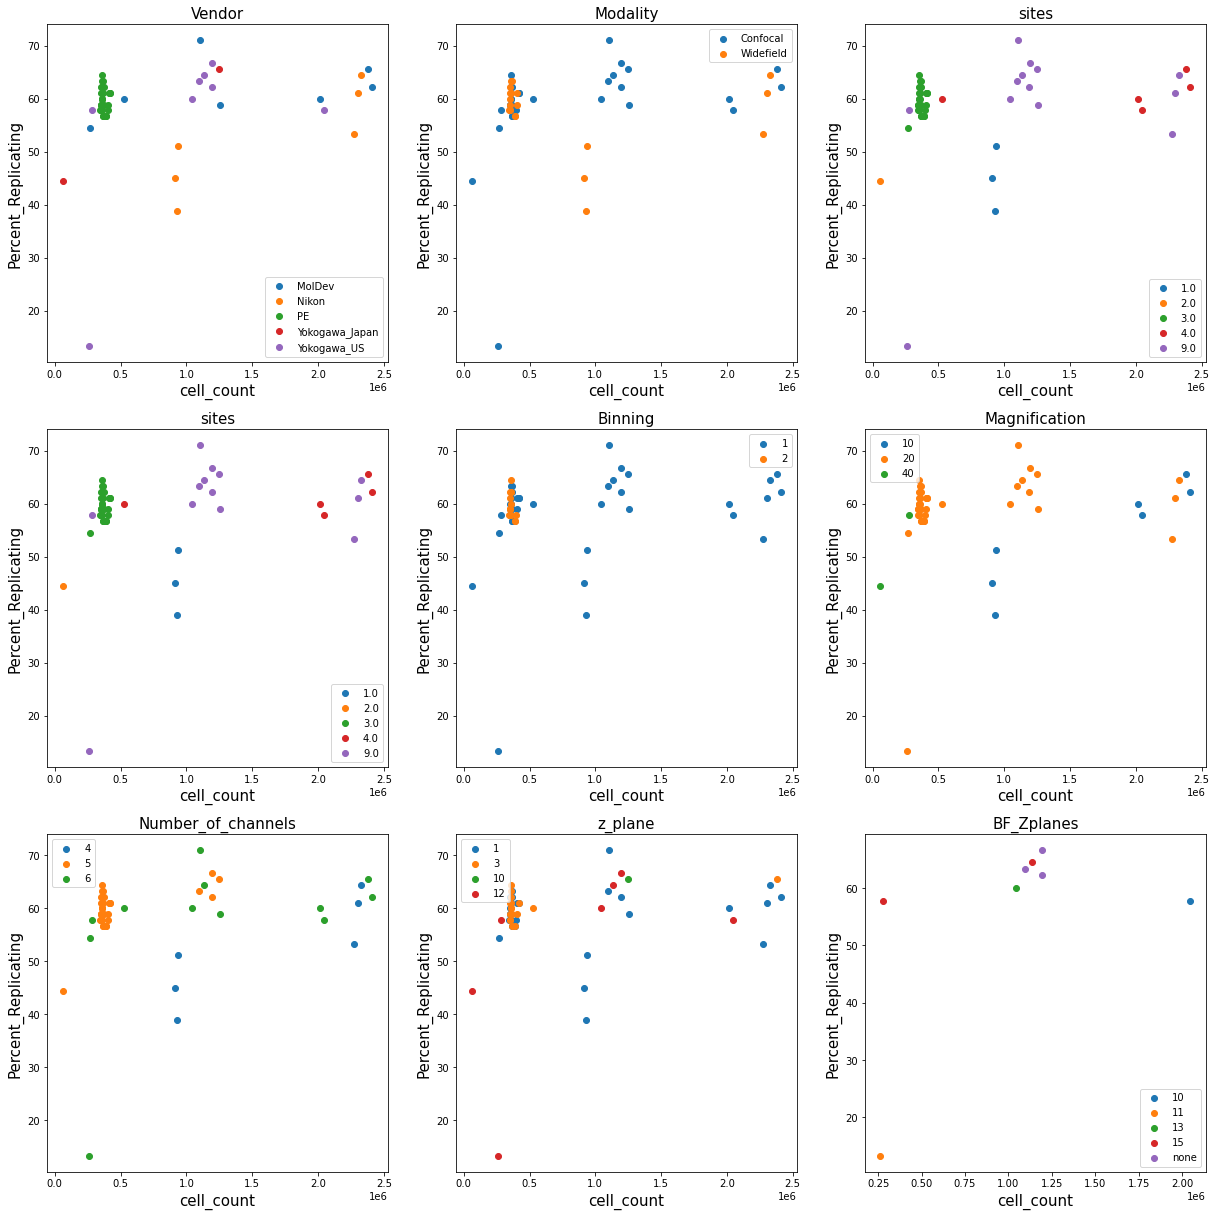

In [91]:
group_columns = ["Vendor", "Modality", "sites", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(17,17))
for i, _ax in zip(group_columns, ax.flatten()):
    group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
# fig.savefig("figures/rep_vs_cell-count_sphering_TRUE_NEW_PROFILE.png")


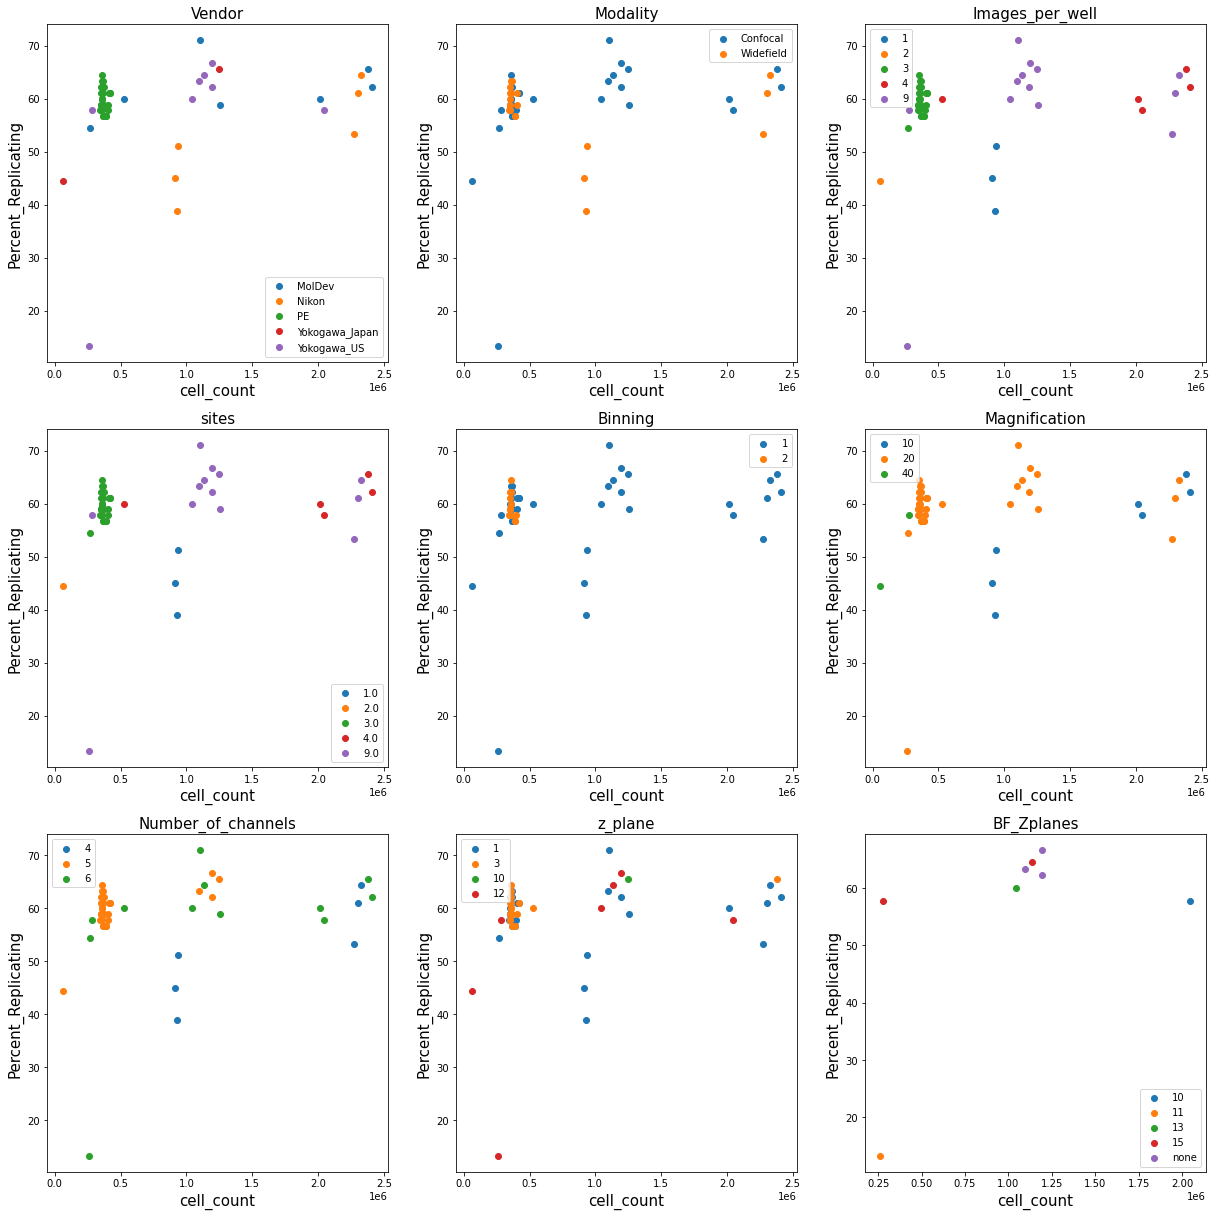

In [92]:
group_columns = ["Vendor", "Modality", "Images_per_well", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(17,17))
for i, _ax in zip(group_columns, ax.flatten()):
    group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
# fig.savefig("figures/rep_vs_cell-count_sphering_FALSE.png")


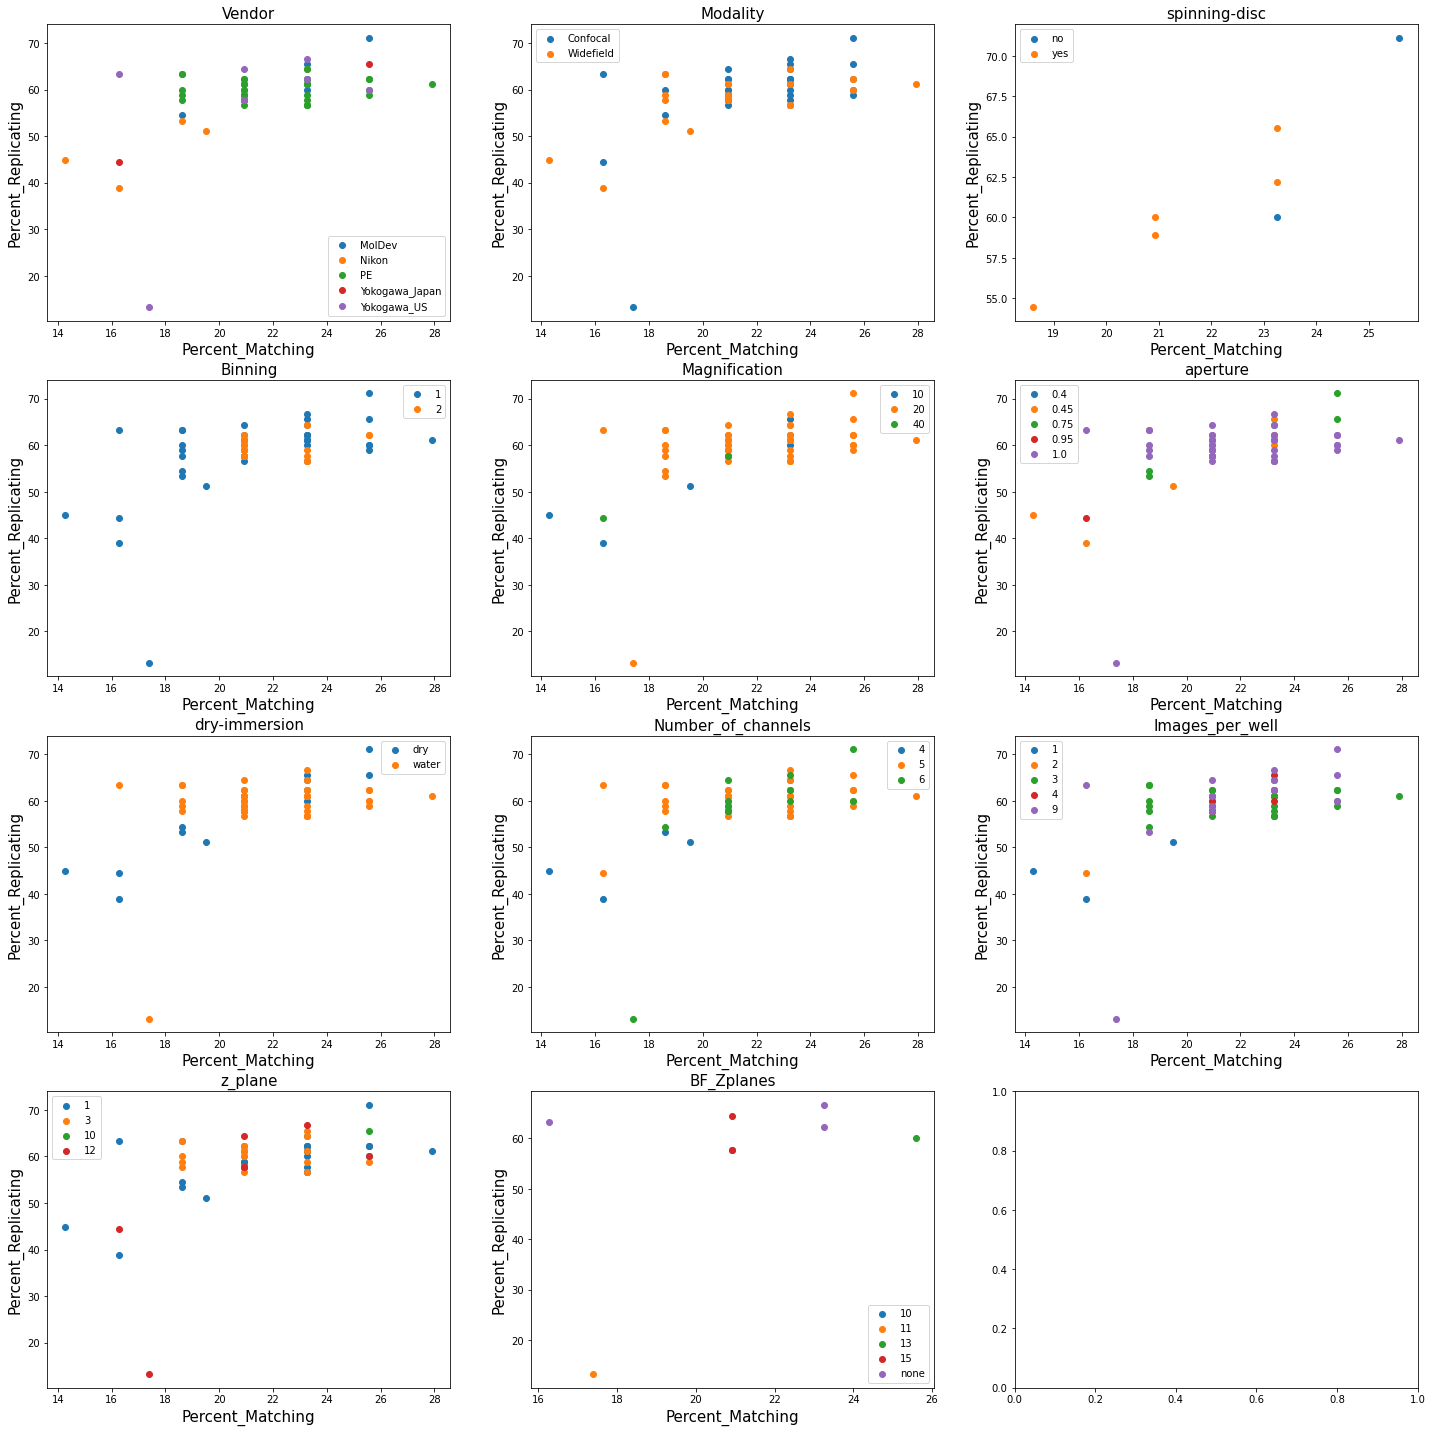

In [93]:
group_columns = ["Vendor", "Modality", "spinning-disc", "Binning", 
                "Magnification", "aperture", "dry-immersion",
                "Number_of_channels", "Images_per_well",
                "z_plane", "BF_Zplanes"]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(4,3, figsize=(20,20))
for i, _ax in zip(group_columns, ax.flatten()):
    group_plot(df_subset, "Percent_Matching", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
# fig.savefig("figures/rep_vs_match_groupings_sphering_FALSE.png")


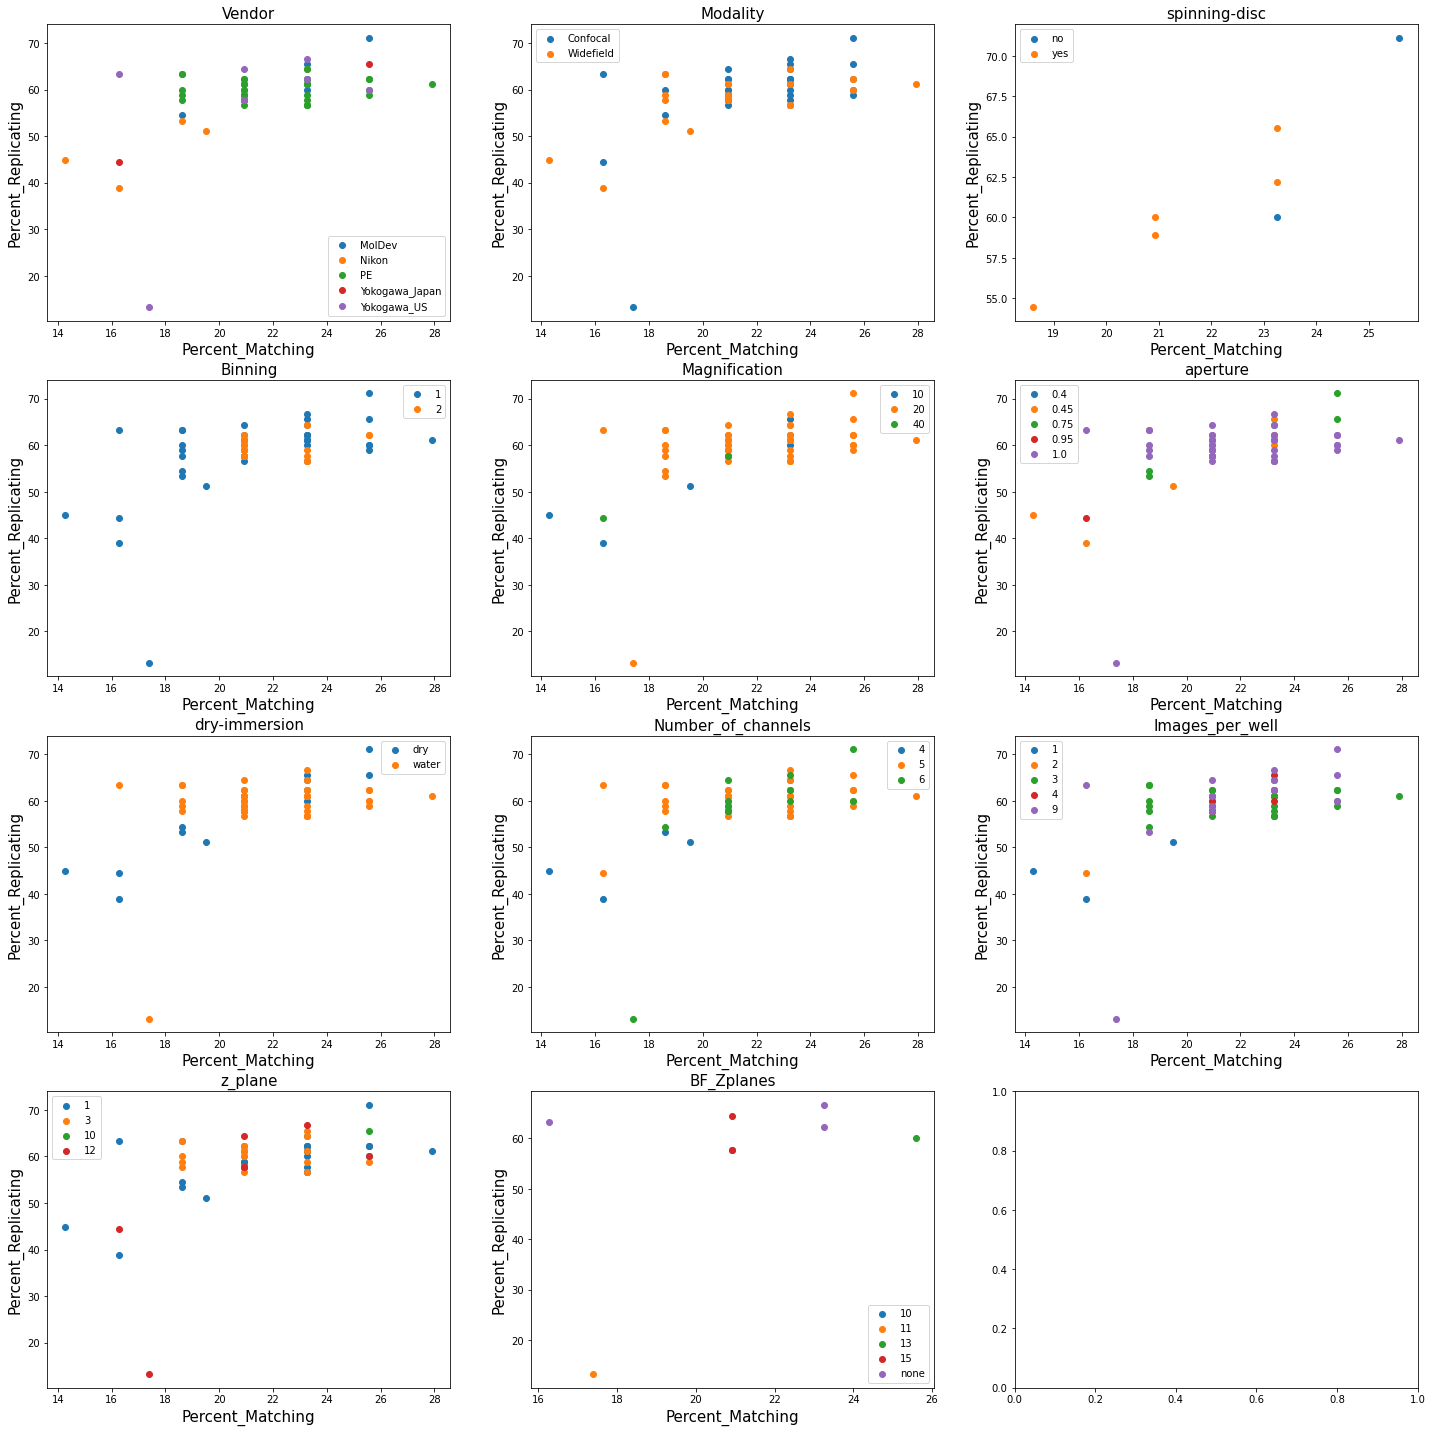

In [95]:
group_columns = ["Vendor", "Modality", "spinning-disc", "Binning", 
                "Magnification", "aperture", "dry-immersion",
                "Number_of_channels", "Images_per_well",
                "z_plane", "BF_Zplanes"]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(4,3, figsize=(20,20))
for i, _ax in zip(group_columns, ax.flatten()):
    group_plot(df_subset, "Percent_Matching", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
# fig.savefig("figures/rep_vs_match_groupings_sphering_TRUE.png")

# Creating mean and SD columns for grouped DF

In [65]:
def find_group_avg_df(_df, group):
    df = _df.copy()
    df['Mean_Percent_Replicating'] = list(df['Percent_Replicating'])
    df['SD_Percent_Replicating'] = list(df['Percent_Replicating'])
    df['Mean_Percent_Matching'] = list(df['Percent_Matching'])
    df['SD_Percent_Matching'] = list(df['Percent_Matching'])
    group_df = df.groupby(
                            group,as_index=False).agg({
                                'Percent_Replicating' : lambda x: list(x),
                                'Mean_Percent_Replicating' : lambda y: np.mean(y),
                                'SD_Percent_Replicating' : lambda z: float('%.3f'%np.std(z)),
                                'Percent_Matching' : lambda x: list(x),
                                'Mean_Percent_Matching' : lambda y: np.mean(y),
                                'SD_Percent_Matching' : lambda z: float('%.3f'%np.std(z))
                                })
    return group_df

find_group_avg_df(match_rep_df.loc[match_rep_df["sphering"]==True], "Vendor")

,Vendor,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
0,MolDev,"[47.77777777777778, 56.66666666666666, 62.2222...",59.506173,4.649,"[18.6046511627907, 18.6046511627907, 20.930232...",19.810508,2.857
1,Nikon,"[55.55555555555556, 43.333333333333336, 44.444...",51.634084,6.883,"[16.27906976744186, 20.930232558139537, 13.953...",18.027532,2.874
2,PE,"[53.333333333333336, 54.44444444444444, 50.0, ...",57.426901,3.039,"[13.953488372093023, 18.6046511627907, 16.2790...",20.269278,3.177
3,Yokogawa_Japan,"[52.22222222222223, 43.333333333333336, 54.444...",53.174603,7.038,"[20.930232558139537, 18.6046511627907, 23.2558...",21.262458,2.896
4,Yokogawa_US,"[54.44444444444444, 47.77777777777778, 43.3333...",54.688679,8.785,"[18.6046511627907, 16.27906976744186, 18.60465...",20.088409,2.901


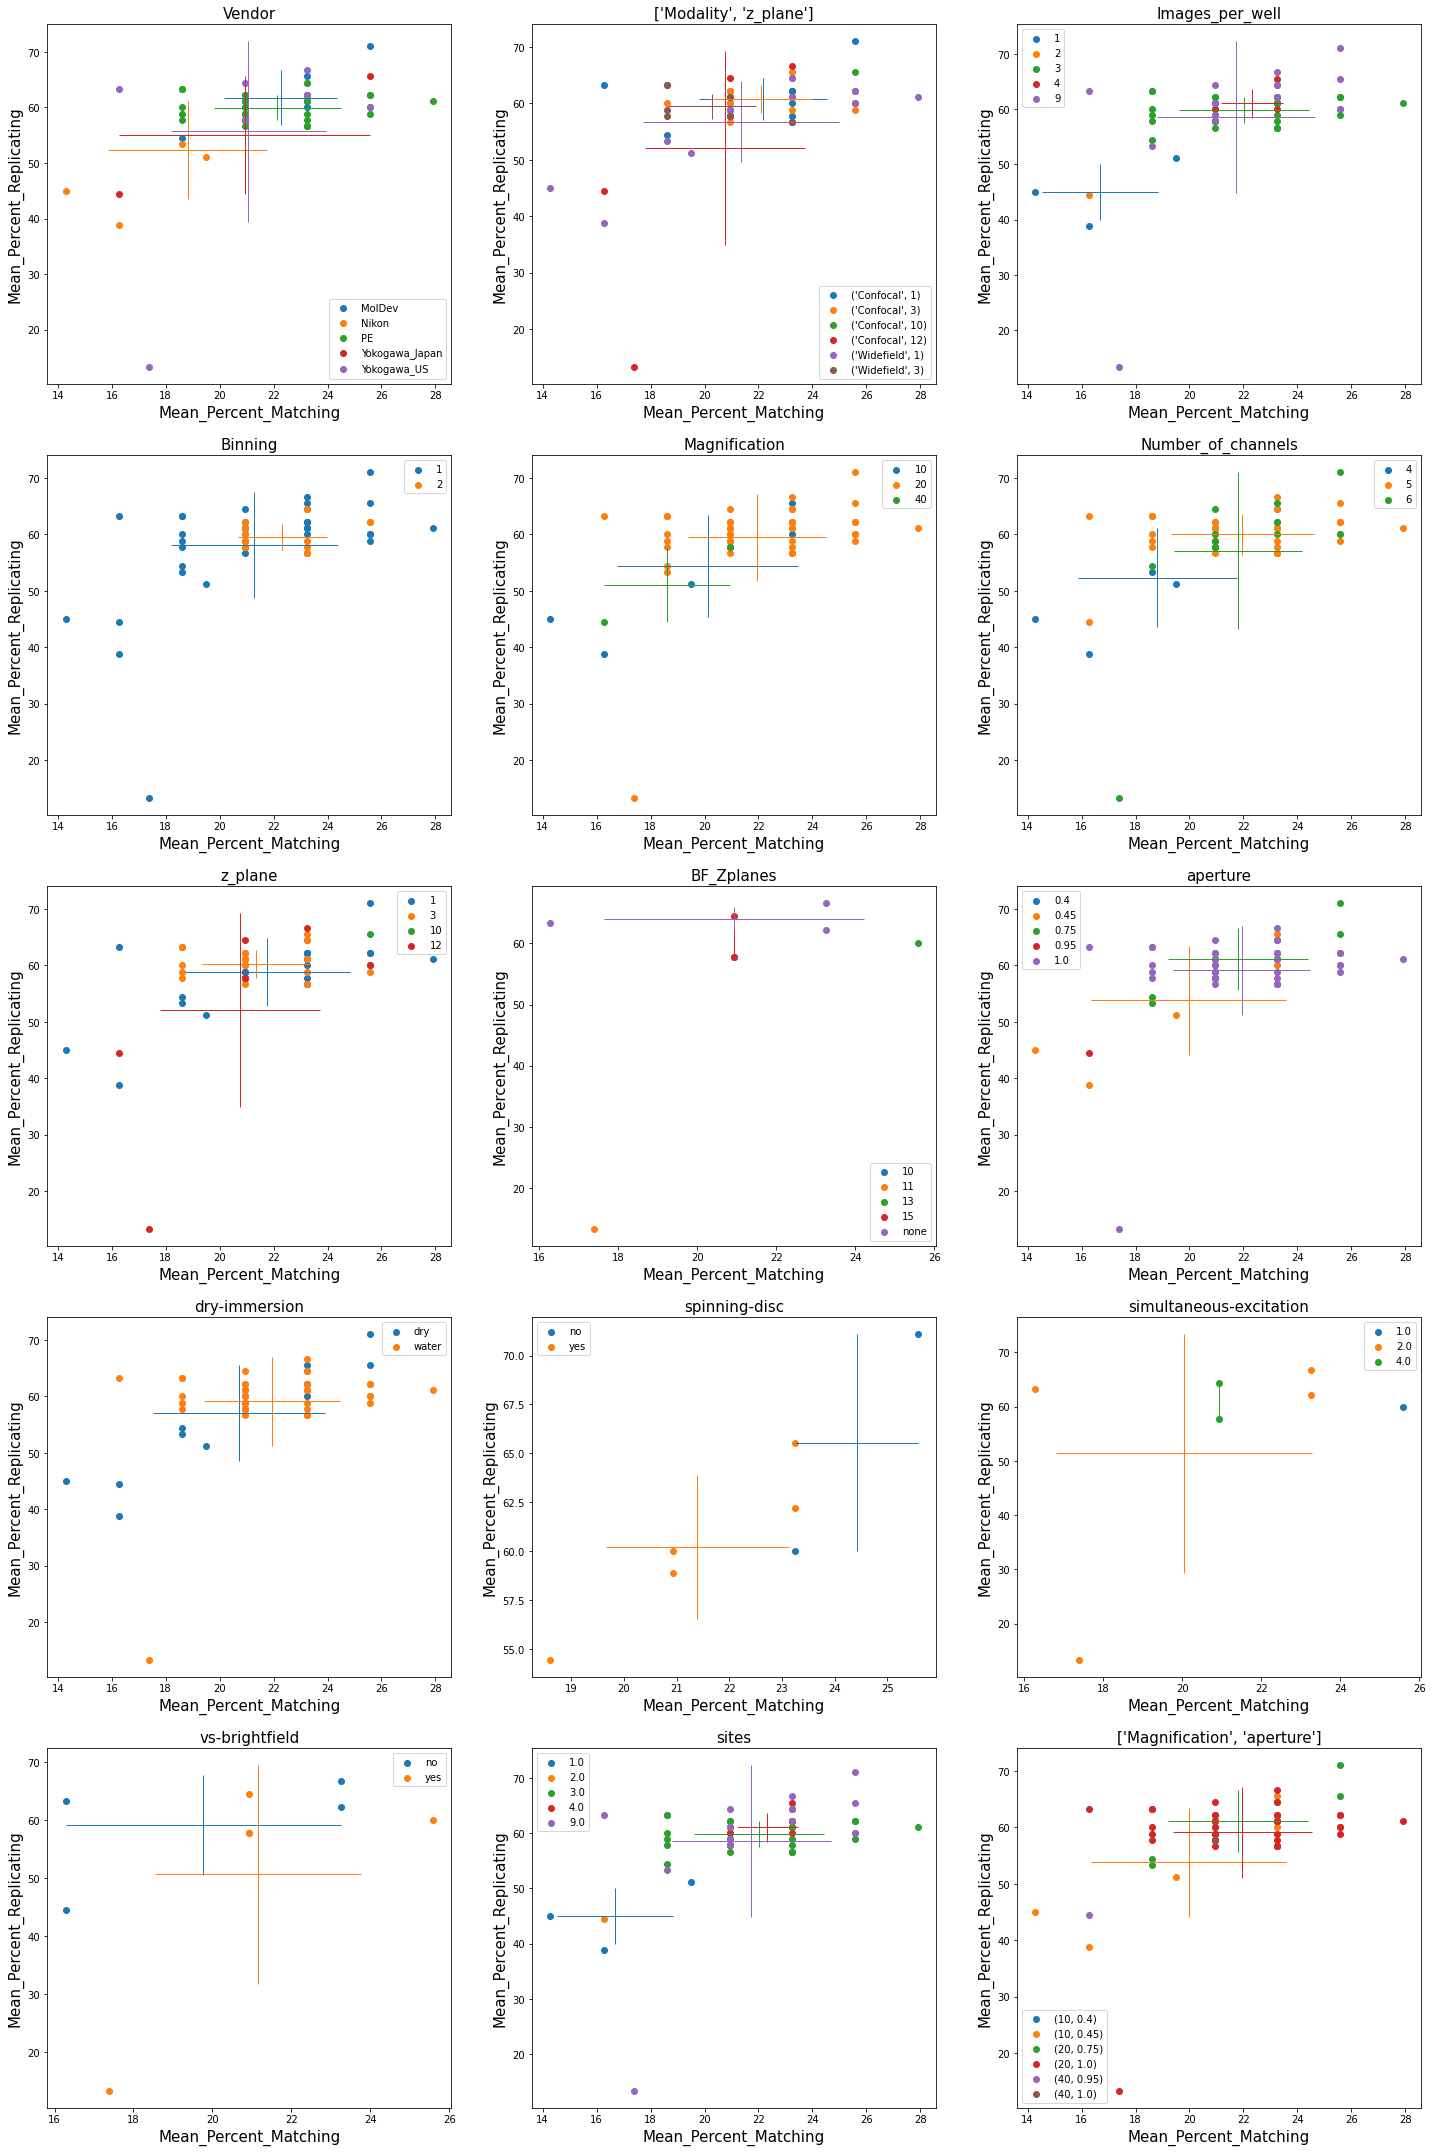

In [96]:
group_columns = ["Vendor", ["Modality", "z_plane"], "Images_per_well", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", "aperture", "dry-immersion", "spinning-disc", 
                "simultaneous-excitation", "vs-brightfield", "sites", ["Magnification", "aperture"]]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(20,30))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = find_group_avg_df(df_subset, i)
        # Plot the scatter
        group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )

    except:
        fig.delaxes(_ax)
        
# fig.savefig("figures/mean-for-ALL-scope-groupings_sphering_TRUE.png")

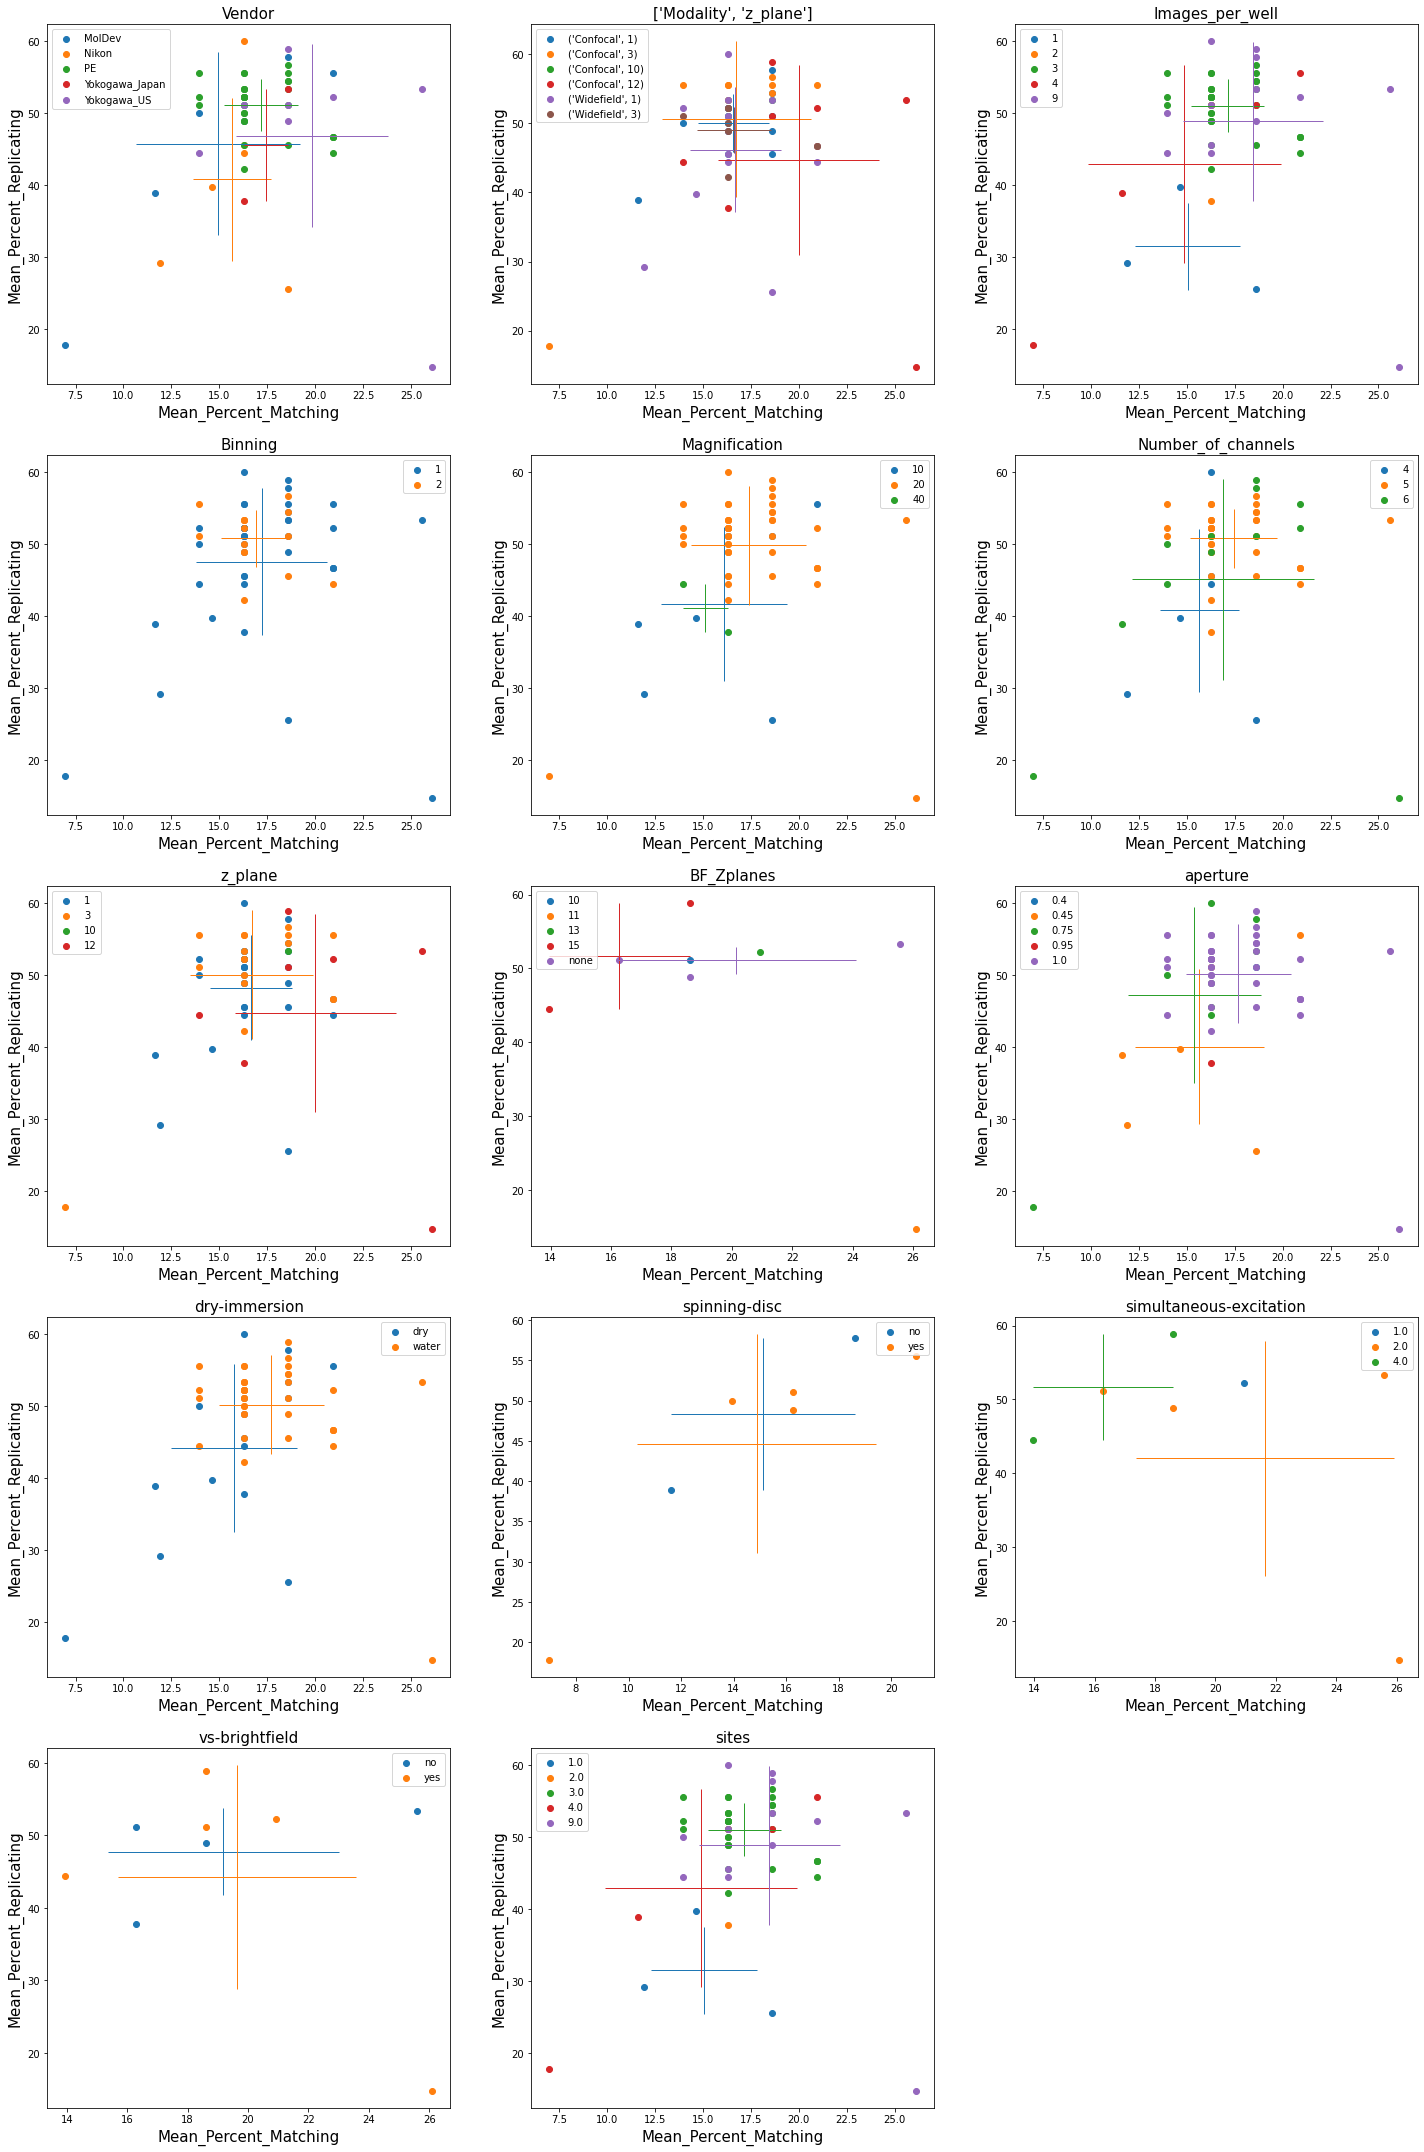

In [98]:
group_columns = ["Vendor", ["Modality", "z_plane"], "Images_per_well", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", "aperture", "dry-immersion", "spinning-disc", 
                "simultaneous-excitation", "vs-brightfield", "sites", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == False)]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(20,30))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = find_group_avg_df(df_subset, i)
        group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax
        )
        group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
# fig.savefig("figures/mean-for-ALL-scope-groupings_sphering_FALSE.png")

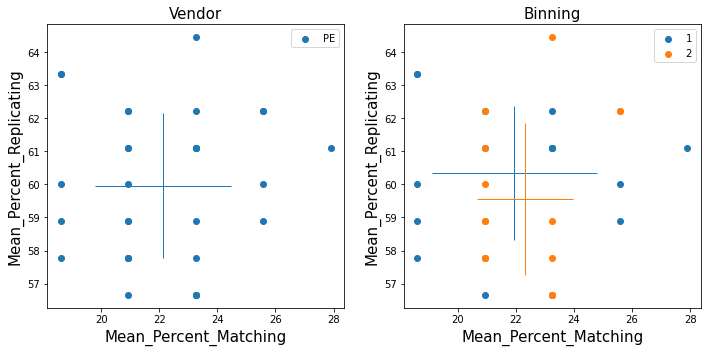

In [99]:
group_columns = ["Vendor", "Binning", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE")]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = find_group_avg_df(df_subset, i)
        group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax
        )
        group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
# fig.savefig("figures/PE-binning-only_sphering_TRUE.png")

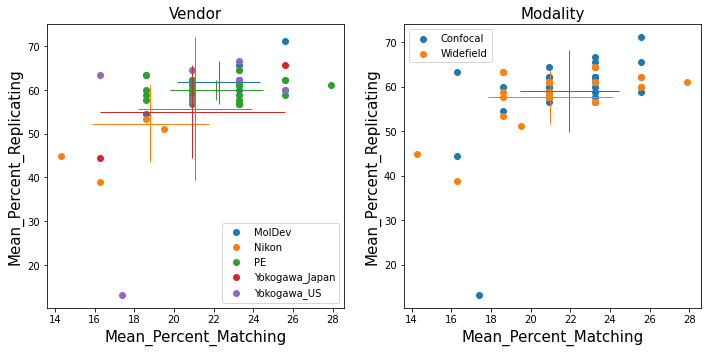

In [100]:
group_columns = ["Vendor", "Modality", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = find_group_avg_df(df_subset, i)
        group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax
        )
        group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
# fig.savefig("figures/modality-only_sphering_TRUE.png")